### Project : 

## E-commerce

Overview: 
    Involves online sales, digital marketing, user experience optimization and 
    handling large volumes of transaction data.

    An international e-commerce company based wants to discover key insights from their customer database. They want to use     some of the most advanced machine learning techniques to study their customers. The company sells electronic products.

Dataset Description

The dataset used for model building contained 10999 observations of 12 variables.
The data contains the following information:
●	ID: ID Number of Customers.
●	Warehouse block: The Company have big Warehouse which is divided in to block such as A,B,C,D,E.
●	Mode of shipment: The Company Ships the products in multiple way such as Ship, Flight and Road.
●	Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
●	Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
●	Cost of the product: Cost of the Product in US Dollars.
●	Prior purchases: The Number of Prior Purchase.
●	Product importance: The company has categorized the product in the various parameter such as low, medium, high.
●	Gender: Male and Female.
●	Discount offered: Discount offered on that specific product.
●	Weight in grams: It is the weight in grams.
●	Reached on time: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.


 # 1. Data Exploration and Cleaning

In [1]:
## Loading the libraries in the memory(main memory)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Loading the library to ignore the harmless warnings occuring while plotting charts

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the csv file from the location where it's stored on the system

EcomDF = pd.read_csv('C:\\Users\\sniga\\Desktop\\python\\project\\E-Commerce-20240608T020715Z-001\\E-Commerce\\E_Commerce.csv',encoding='unicode_escape')

In [3]:
# Seeing the preview of the kind of dataset we transferred to the dataframe from the csv file

EcomDF.head()


,ï»¿ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
# Checking for missing values in the data

print("Found no missing values in the data")
EcomDF.isnull().sum()



Found no missing values in the data


ï»¿ID                  0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

Findings :# Found NO values missing in the data file
So there are no empty columns in the dataframe

In [5]:
## checking for the data for the no. of rows and no. of columns

EcomDF.shape



(10999, 12)

 Finding : comes out to have 10999 rows and 12 columns

In [6]:
# Checking for duplicate rows

duplicates = EcomDF[EcomDF.duplicated()].sum()
print("No duplicate data ", duplicates)



No duplicate data  ï»¿ID                  0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: object


Finding :  There are no duplicate rows

In [7]:
# Average number of customer calls

avg_calls = EcomDF['Customer_care_calls'].mean()
print("On an average ",avg_calls," calls are made by a customer")

On an average  4.054459496317847  calls are made by a customer


Finding : on an average 4 calls are made by a customer

In [8]:
# Average Customer rating

avg_rating = EcomDF['Customer_rating'].mean()
print("Average customer ratings for the products : ", avg_rating)

Average customer ratings for the products :  2.9905445949631786


Finding : the average rating given by the customer is 2.9

In [9]:
# Average Cost of our product

avg_cost = EcomDF['Cost_of_the_Product'].mean()
print("Average cost for the product : ", avg_cost)

Average cost for the product :  210.19683607600692


Finding : the average cost of the company's product is 210 approx

In [10]:
# Basic statistics of the dataset

EcomDF.describe()

,ï»¿ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


Finding : the basic statistics of the data set

In [11]:
# Finding the types of unique values avilabe in the dataset

EcomDF.nunique()

ï»¿ID                  10999
Warehouse_block            5
Mode_of_Shipment           3
Customer_care_calls        6
Customer_rating            5
Cost_of_the_Product      215
Prior_purchases            8
Product_importance         3
Gender                     2
Discount_offered          65
Weight_in_gms           4034
Reached.on.Time_Y.N        2
dtype: int64

In [12]:
# Number of times shipemnt sent by each means

EcomDF['Mode_of_Shipment'].value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

Findings: the modes of shipment used to deliver:
        7462 times by ship, 
        1777 times flight and 
        1760 times by road

In [13]:
# Number of times the parcel reached on time: 0 and late : 1

EcomDF['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

Findings : The number of times the shipment reached on time : 4436  
the nnumber of times shipment was late is :6563

#  2. Data Visualization

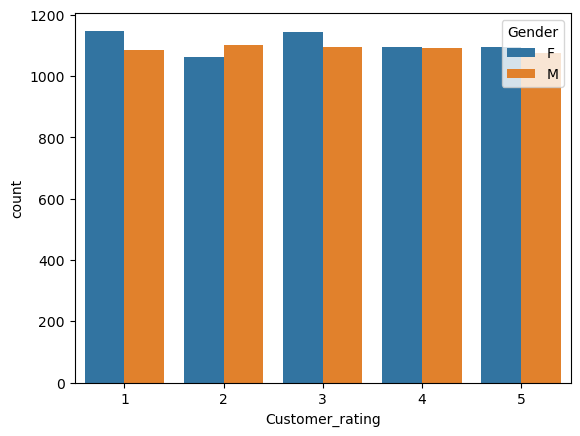

In [14]:
# visualising customer ratings gender wise

sns.countplot(x='Customer_rating',hue='Gender',data=EcomDF)
plt.savefig("Customer_Ratings_by_Gender.png", transparent=True)

Findings : Females have given slightly lesser ratings to the products than men

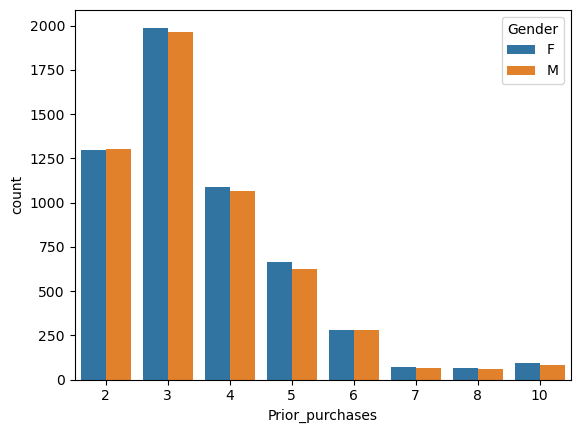

In [15]:
# visualising previous purchases gender wise


sns.countplot(x='Prior_purchases',hue='Gender',data=EcomDF)
plt.savefig("prior_purchases.png", transparent=True)

Finding : mostly the prior purchases are done 3 times by men and women

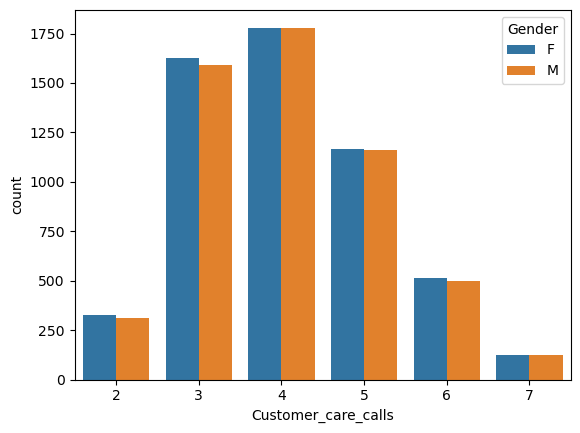

In [16]:
# visualising calls received by customer care centres gender wise


sns.countplot(x='Customer_care_calls',hue='Gender',data=EcomDF)
plt.savefig("customer_care_calls.png", transparent=True)

Finding : Mostly 3 to 4 calls are made by the customers

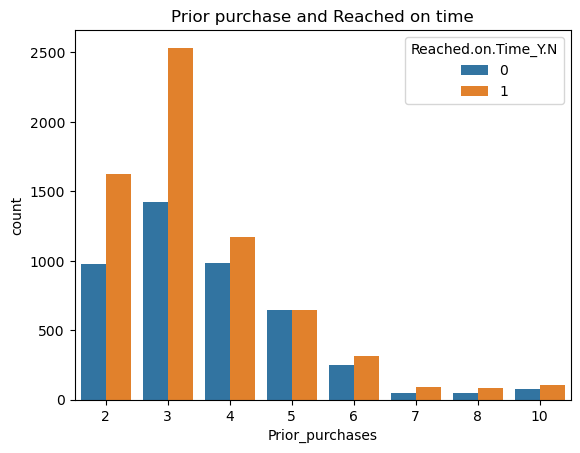

<Figure size 640x480 with 0 Axes>

In [17]:
# visualising previous purchases according to their reaching time to see how many were ontime or late

sns.countplot(x = "Prior_purchases", data = EcomDF,hue=EcomDF['Reached.on.Time_Y.N'])
plt.title('Prior purchase and Reached on time')
plt.show()
plt.savefig("prior_purchases_vs_reached_on_time.png", transparent=True)

Finding : Most of the orders did not reach on time to the customers

In [18]:
# customer ratings

EcomDF['Customer_rating'].value_counts()

Customer_rating
3    2239
1    2235
4    2189
5    2171
2    2165
Name: count, dtype: int64

Finding : Most customers have given the product a rating of 3 and to an average rating of 2

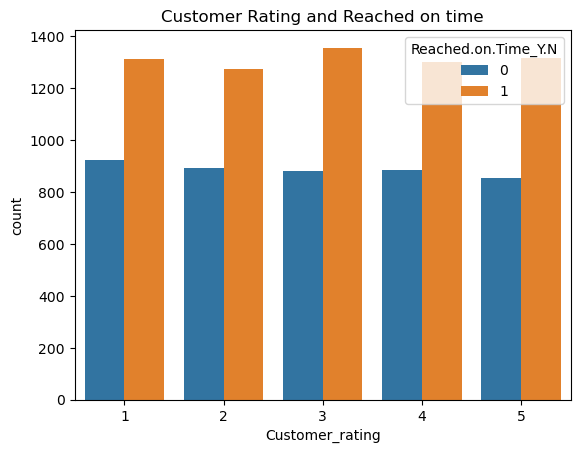

<Figure size 640x480 with 0 Axes>

In [19]:
# visualising customer ratings on prosucts that reached on time vs products that reached late

sns.countplot(x = "Customer_rating", data = EcomDF ,hue=EcomDF['Reached.on.Time_Y.N'])
plt.title('Customer Rating and Reached on time')
plt.show()
plt.savefig("customer_rating_vs_reached_on_time.png", transparent=True)

Finding : The ratings are no impacted by the product delivery getting delayed much

In [20]:
# products that are importance priority

prod_imp = EcomDF['Product_importance'].value_counts()
print(prod_imp)

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64


Finding : Most products to be delivered are of low priority and very less high priority items are being delivered

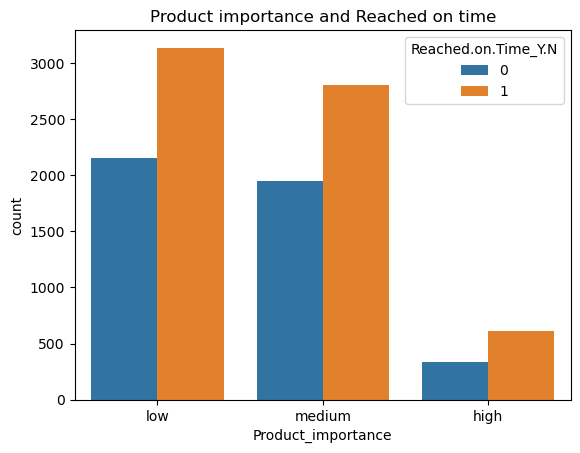

<Figure size 640x480 with 0 Axes>

In [21]:
# visualising products that reached on time vs products that reached late and the importance level of the product

sns.countplot(x = "Product_importance", data = EcomDF ,hue=EcomDF['Reached.on.Time_Y.N'])
plt.title('Product importance and Reached on time')
plt.show()
plt.savefig("product_importance_vs_reached_on_time.png", transparent=True)

Finding : Even High priority priority products are getting delayed delivery

In [22]:
# no. of items reached on time and no. of items which are late

reached_or_not = EcomDF['Reached.on.Time_Y.N'].value_counts()
print(reached_or_not)

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64


Finding : Most products have not reached on time

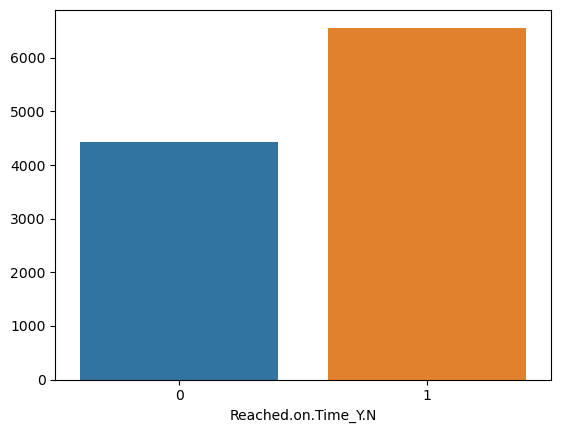

In [23]:
# plotting no. of items reached on time and no. of items which are late

sns.barplot(x=reached_or_not.index,y=reached_or_not.values)

plt.savefig("reached_on_time.png", transparent=True)

Finding : more than 6000 products have delayed delivery while only above 4000 have reached on time

In [24]:
EcomDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ï»¿ID                10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


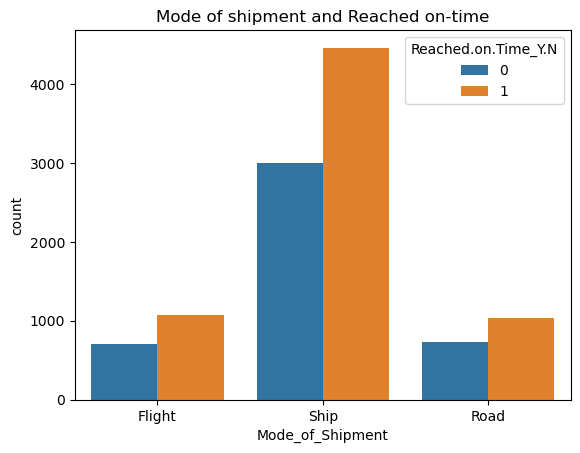

<Figure size 640x480 with 0 Axes>

In [25]:
# ontime and late reaching products according to their mode of shipment


sns.countplot(x = "Mode_of_Shipment", data = EcomDF,hue=EcomDF['Reached.on.Time_Y.N'])
plt.title('Mode of shipment and Reached on-time')
plt.show()
plt.savefig("Mode_of_shipment_vs_reached_on_time.png", transparent=True)

Finding : Most products delayed are sent by ship but most products on time are also sent by ship

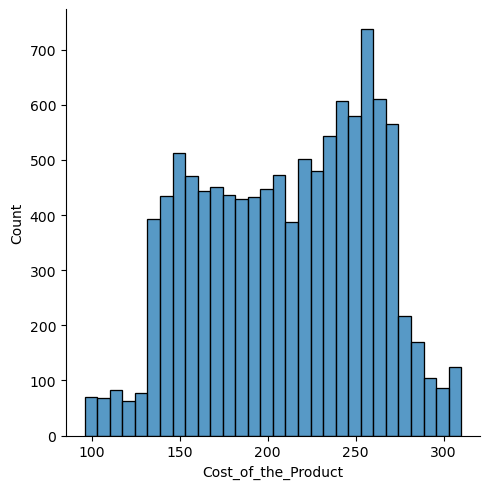

In [26]:
 # no. of products sold vs cost of the products sold 

sns.displot(EcomDF['Cost_of_the_Product'])

plt.savefig("cost_of_prosucts.png", transparent=True)

Finding : more than 700 products are of price 270

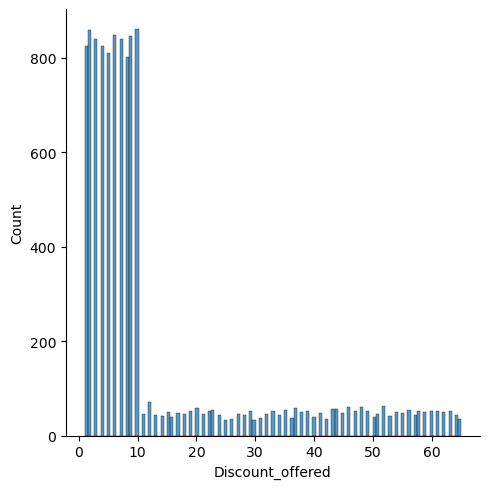

In [27]:
# discounts offered on no. of products

sns.displot(EcomDF['Discount_offered'])

plt.savefig("Discount_offered.png", transparent=True)

Finding : Mostly the discount is offered less than 10%

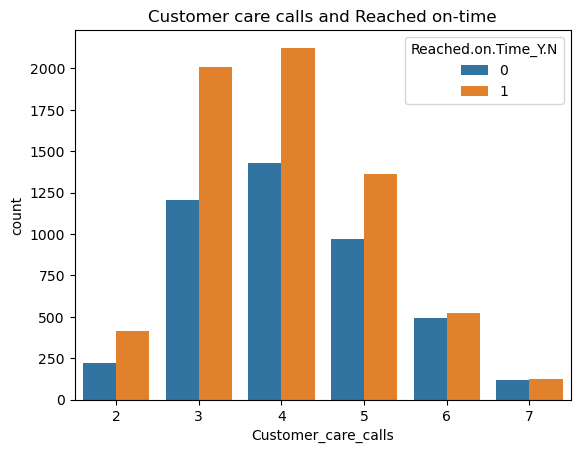

<Figure size 640x480 with 0 Axes>

In [28]:
#  no. of calls received for ontime and late reacing products

sns.countplot(x = "Customer_care_calls", data = EcomDF,hue=EcomDF['Reached.on.Time_Y.N']);
plt.title('Customer care calls and Reached on-time')
plt.show()
plt.savefig("customer_care_calls_vs_reached_on_time.png", transparent=True)

Finding : Most customers call as the products don't reach on time

In [29]:
EcomDF['Weight_in_gms'].value_counts()

Weight_in_gms
4883    12
1145    10
5783    10
4741    10
5672    10
        ..
1425     1
3811     1
1609     1
2178     1
1098     1
Name: count, Length: 4034, dtype: int64

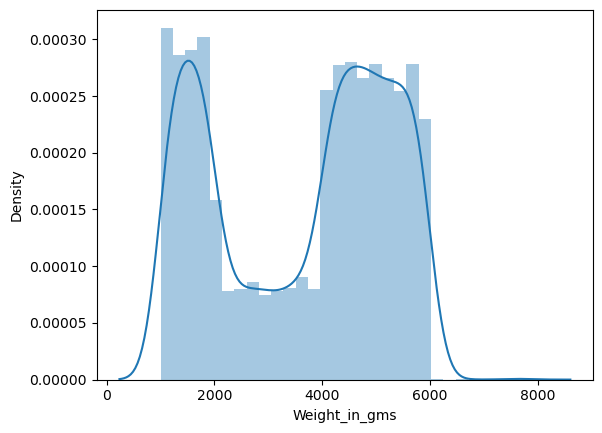

In [30]:
sns.distplot(EcomDF['Weight_in_gms'],bins=30)
plt.savefig("weight_in_gms.png", transparent=True)

Finding : Visualising weight of the products with density

# Starting Data Analysis

In [31]:
EcomDF.head()

,ï»¿ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [32]:
EcomDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ï»¿ID                10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [33]:
# Assigning dummy values

warehouse = EcomDF['Warehouse_block']
warehouse = pd.get_dummies(warehouse,drop_first=True)


In [34]:
# Assigning dummy values
mode_of_shipment = EcomDF['Mode_of_Shipment']
mode_of_shipment = pd.get_dummies(mode_of_shipment,drop_first=True)

In [35]:
# Replacing categorical values of product_importance and gender.

EcomDF["Product_importance"].replace({"low":0,"medium":1,"high":2},inplace=True)
EcomDF["Gender"].replace({'F':0,'M':1},inplace=True)

In [36]:

#Dropping ID, warehouse_block and Mode_of_shipment as we took thier dummy values to other variables

EcomDF =  EcomDF.drop(['ï»¿ID','Warehouse_block','Mode_of_Shipment'],axis=1)


In [37]:
EcomDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer_care_calls  10999 non-null  int64
 1   Customer_rating      10999 non-null  int64
 2   Cost_of_the_Product  10999 non-null  int64
 3   Prior_purchases      10999 non-null  int64
 4   Product_importance   10999 non-null  int64
 5   Gender               10999 non-null  int64
 6   Discount_offered     10999 non-null  int64
 7   Weight_in_gms        10999 non-null  int64
 8   Reached.on.Time_Y.N  10999 non-null  int64
dtypes: int64(9)
memory usage: 773.5 KB


In [38]:
EcomDF.to_excel('EcommerceProcessed.xlsx', index=False)

In [39]:
EcomDF.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,4,2,177,3,0,0,44,1233,1
1,4,5,216,2,0,1,59,3088,1
2,2,2,183,4,0,1,48,3374,1
3,3,3,176,4,1,1,10,1177,1
4,2,2,184,3,1,0,46,2484,1


In [40]:
# concatinating EcomDF and dummy_variables

EcomDF1 = pd.concat([EcomDF,warehouse,mode_of_shipment],axis=1)

In [41]:
EcomDF1.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,B,C,D,F,Road,Ship
0,4,2,177,3,0,0,44,1233,1,False,False,True,False,False,False
1,4,5,216,2,0,1,59,3088,1,False,False,False,True,False,False
2,2,2,183,4,0,1,48,3374,1,False,False,False,False,False,False
3,3,3,176,4,1,1,10,1177,1,True,False,False,False,False,False
4,2,2,184,3,1,0,46,2484,1,False,True,False,False,False,False


In [42]:
X = EcomDF1.drop('Reached.on.Time_Y.N',axis=1)
y = EcomDF1['Reached.on.Time_Y.N']

In [43]:
# Making the train and test split

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [45]:
print(X_train.shape)
print(X_test.shape)

(7369, 14)
(3630, 14)


In [46]:
#just checkimg the split is okay

X_test.head ()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,B,C,D,F,Road,Ship
4919,2,1,228,2,1,1,10,4854,False,False,False,True,True,False
5489,4,1,259,7,1,0,4,5102,False,False,False,True,False,False
4869,3,2,264,3,0,0,8,5831,True,False,False,False,False,True
2073,5,1,214,3,0,1,33,2562,True,False,False,False,False,True
9382,3,5,144,3,1,0,9,5912,False,True,False,False,False,True


# Create a model and train the model on the training data

In [47]:
# Decision Tree model

In [48]:
from sklearn.tree import DecisionTreeClassifier

# object creation

dt = DecisionTreeClassifier()

# train the model on the training data

(dt.fit(X_train,y_train))

DecisionTreeClassifier()

In [49]:
# predict the response for the test data

y_pred_dt = dt.predict(X_test)
y_pred_dt
# predicted values of y

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

In [50]:
# actual values of y_test

y_test

4919    1
5489    0
4869    0
2073    1
9382    0
       ..
2187    1
9068    0
2225    1
4574    0
5803    1
Name: Reached.on.Time_Y.N, Length: 3630, dtype: int64

## check for accuracy of our model used / Evaluate our model

In [51]:
from sklearn.metrics import accuracy_score

acc_dt = accuracy_score(y_test,y_pred_dt)

print("The accuracy of the decision tree model is ", acc_dt)

The accuracy of the decision tree model is  0.6575757575757576


# Applying Random Forest Classifier


In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix

rf = RandomForestClassifier()

In [53]:
# train our rf model with training data
rf.fit(X_train,y_train)

RandomForestClassifier()

In [54]:
# predict the data valye y
y_pred_rf = rf.predict(X_test)

In [55]:
# Actual value of y

y_test

4919    1
5489    0
4869    0
2073    1
9382    0
       ..
2187    1
9068    0
2225    1
4574    0
5803    1
Name: Reached.on.Time_Y.N, Length: 3630, dtype: int64

# Check for accuracy

In [56]:
acc_rf = accuracy_score(y_test,y_pred_rf)

In [57]:
print("The accuracy of the random forest classifier model is ", acc_rf)

The accuracy of the random forest classifier model is  0.6619834710743802


In [58]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.55      0.72      0.63      1419
           1       0.78      0.62      0.69      2211

    accuracy                           0.66      3630
   macro avg       0.66      0.67      0.66      3630
weighted avg       0.69      0.66      0.67      3630



In [59]:
# creating confusion matrix

cm = confusion_matrix(y_test,y_pred_rf)
cm

array([[1026,  393],
       [ 834, 1377]], dtype=int64)

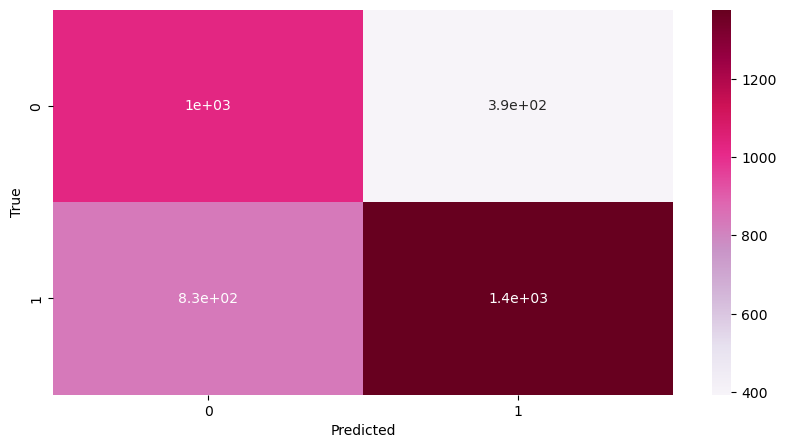

In [60]:
# creating heatmap of the confusion matrix

plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap='PuRd')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("rf_prediction.png", transparent=True)

# Using KNN method

In [61]:
from sklearn.neighbors import KNeighborsClassifier

# creating the object of class

knn = KNeighborsClassifier()

In [62]:
# training data pass to train the model
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [63]:
# Predicting the value of y

y_pred_knn = knn.predict(X_test)

In [64]:
acc_knn = accuracy_score(y_test,y_pred_knn)

print("The accuracy of the KNN model is ", acc_knn)

The accuracy of the KNN model is  0.6586776859504132


# Hyperparameter Tuning

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:

#Number of trees in random_forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1400,num=12)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximim number of levels in tree
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
#Minimum number of samples required to split a node
min_samples_split = [2,5,10,13,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,8,10]

In [67]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf  
              }

print(random_grid)

{'n_estimators': [100, 218, 336, 454, 572, 690, 809, 927, 1045, 1163, 1281, 1400], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 13, 15, 100], 'min_samples_leaf': [1, 2, 5, 8, 10]}


In [68]:
rf1 = RandomForestClassifier()

In [69]:
rf_random = RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=12,cv=25,verbose=2,random_state=42,n_jobs=1)

In [70]:
# Training the model after Hypertuning

rf_random.fit(X_train,y_train)

Fitting 25 folds for each of 12 candidates, totalling 300 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1045; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1045; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1045; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1045; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1045; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1045; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1045; total time=   0.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_sp

[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1045; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1045; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1045; total time=   0.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=1045; total time=   0.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1281; total time=   6.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1281; total time=   6.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1281; total time=   7.3s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1281; total time=   6.8s
[CV] END max_depth=5, ma

[CV] END max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=690; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=690; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=690; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=690; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=690; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=690; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=690; total time=   0.0s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=690; total time=   0.0s
[CV] END max_depth=15, max_featu

[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=15, n_estimators=1163; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=15, n_estimators=1163; total time=   0.0s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=15, n_estimators=1163; total time=   0.0s


RandomizedSearchCV(cv=25, estimator=RandomForestClassifier(), n_iter=12,
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 8, 10],
                                        'min_samples_split': [2, 5, 10, 13, 15,
                                                              100],
                                        'n_estimators': [100, 218, 336, 454,
                                                         572, 690, 809, 927,
                                                         1045, 1163, 1281,
                                                         1400]},
                   random_state=42, verbose=2)

In [71]:
# Predicting the values

predictions_cv = rf_random.predict(X_test)

In [72]:
# checking for accuracy 

accuracy_rf_1 = metrics.accuracy_score(y_test,predictions_cv)

In [73]:
print("Accuracy after tuning " , accuracy_rf_1)

Accuracy after tuning  0.6741046831955922


In [74]:
print(classification_report(y_test,predictions_cv))

              precision    recall  f1-score   support

           0       0.55      0.87      0.68      1419
           1       0.87      0.55      0.67      2211

    accuracy                           0.67      3630
   macro avg       0.71      0.71      0.67      3630
weighted avg       0.74      0.67      0.67      3630



In [75]:
# Creating the confusion matrix

cm = confusion_matrix(y_test,predictions_cv)

In [76]:
# confusion matrix print
cm

array([[1229,  190],
       [ 993, 1218]], dtype=int64)

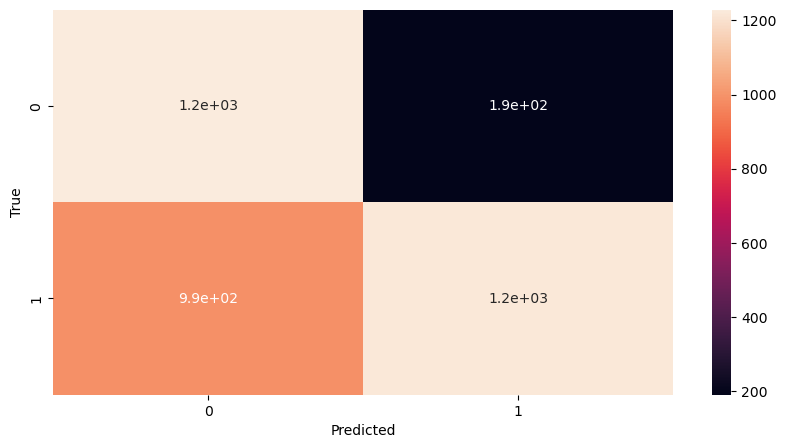

In [77]:
# Plotting the heatmap for actual and prediction of the hypertuned confusion matrix

plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig("hypertuned_rf_prediction.png", transparent=True)

In [78]:
print("Comparing the model accuracy of the models used")
print("The accuracy of the decision tree model is ", acc_dt)
print("The accuracy of the random forest classifier model is ", acc_rf)
print("The accuracy of the KNN model is ", acc_knn)
print("Accuracy after tuning " , accuracy_rf_1)

Comparing the model accuracy of the models used
The accuracy of the decision tree model is  0.6575757575757576
The accuracy of the random forest classifier model is  0.6619834710743802
The accuracy of the KNN model is  0.6586776859504132
Accuracy after tuning  0.6741046831955922


Finding : The Random Forest Classifier model outperformed the other models in predicting on-time deliveries at 66.19 %
python


Random Forest's performance was further improved using RandomizedSearchCV, leading to a higher accuracy of 67.41%.

 Conclusion:
        
This project successfully explored and analyzed the E-commerce dataset. Key insights were derived through visualizations, and predictive models were built to forecast delivery outcomes. Random Forest proved to be the most effective model, and hyperparameter tuning further enhanced its accuracy.

